In [3]:
import math
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
from bs4 import BeautifulSoup

def update_data(xls, csv):
    df = pd.read_csv(csv, index_col= ['Date'], parse_dates=True)
    html = BeautifulSoup(open(xls, encoding='utf8'), "lxml")
    items = []

    for tr in html.find_all("tr")[1:]:
        children = list(tr.children)
        d = dt.datetime.strptime(children[2].string, "%Y/%m/%d %H:%M:%S")
        if d > df.index[-1]:
            dict = {'Code': children[0].string, 
                'Name': children[1].string,
                'Date': d,
                'Close': children[3].string,
                'Volumn': children[4].string,
                'Change': children[5].string,
                'Turnover': children[6].string,
                'PE': children[7].string,
                'PB': children[8].string,
                'Average': children[9].string,
                'AmountPercentage': children[10].string,
                'HQLTSZ': children[11].string.replace(',', ''),
                'AHQLTSZ': children[12].string.replace(',', ''),
                'Payout': children[13].string}
            # Code,Name,Date,Open,High,Low,Close,Volumn,Amount,Change,Turnover,PE,PB,Average,AmountPercentage,HQLTSZ,AHQLTSZ,Payout
            item_str = '{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{},{}'.format(
                        dict["Code"], dict["Name"], dict["Date"].strftime("%m/%d/%Y"), '', '', '',
                        dict["Close"], dict["Volumn"], '', 
                        dict["Change"], dict["Turnover"], dict["PE"], dict["PB"],
                        dict["Average"], dict["AmountPercentage"], 
                        dict["HQLTSZ"], dict["AHQLTSZ"], dict["Payout"])
            items.append(item_str)

    with open(csv, 'a', encoding="utf-8") as file:
        for i in reversed(items):    
            file.write(i + "\n")

update_data(r'C:/Users/nn1003/Downloads/801811.xls', r'C:/Users/nn1003/Documents/Invest/RInvest/sw/801811.csv')
update_data(r'C:/Users/nn1003/Downloads/801813.xls', r'C:/Users/nn1003/Documents/Invest/RInvest/sw/801813.csv')

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_rows', 9999) 
pd.set_option('precision', 3)

df_xp = pd.read_csv(r'C:/Users/nn1003/Documents/Invest/RInvest/sw/801813.csv', 
                  index_col= ['Date'], parse_dates=True)

df_jy = pd.read_csv(r'C:/Users/nn1003/Documents/Invest/RInvest/sw/801811.csv', 
                  index_col= ['Date'], parse_dates=True)

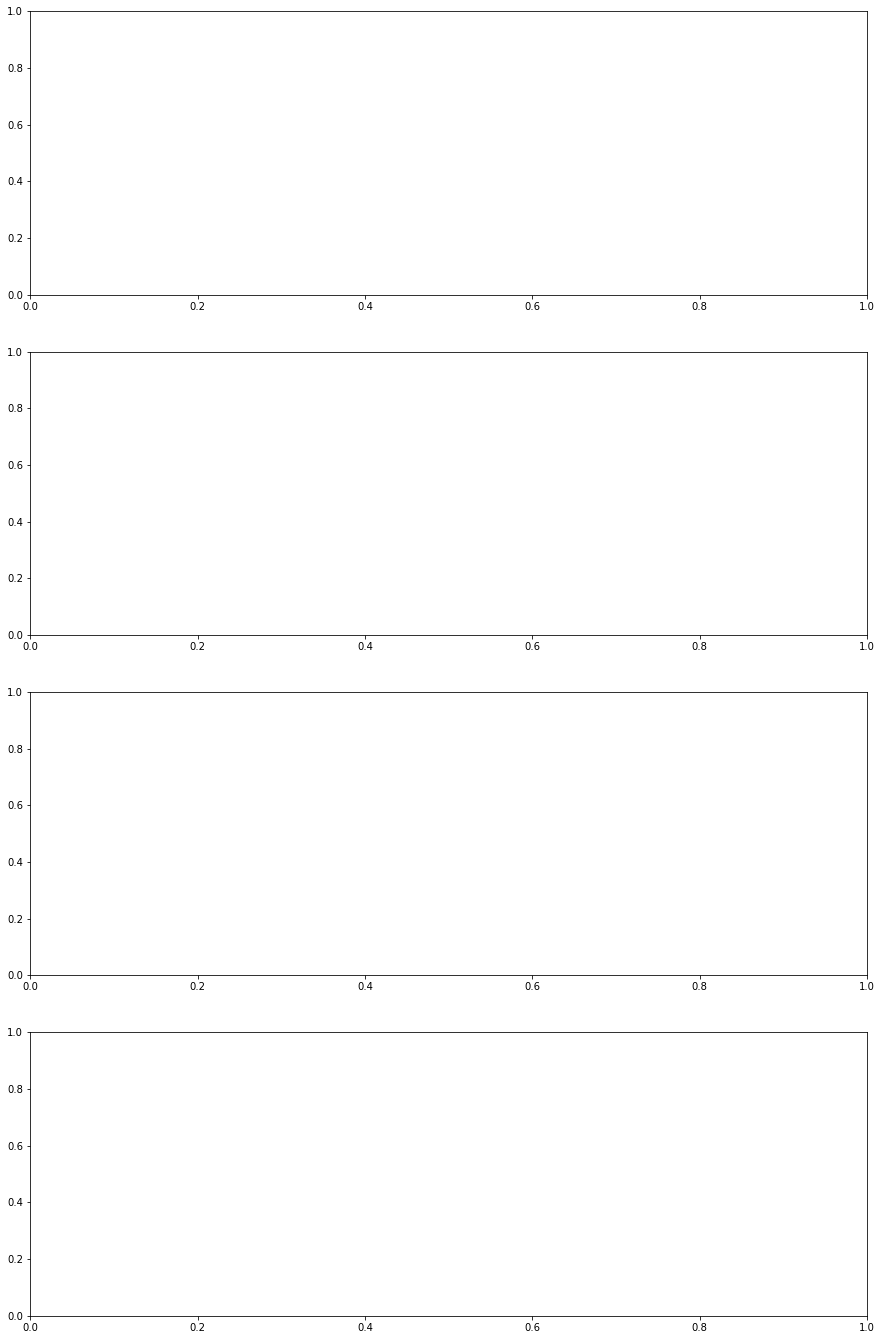

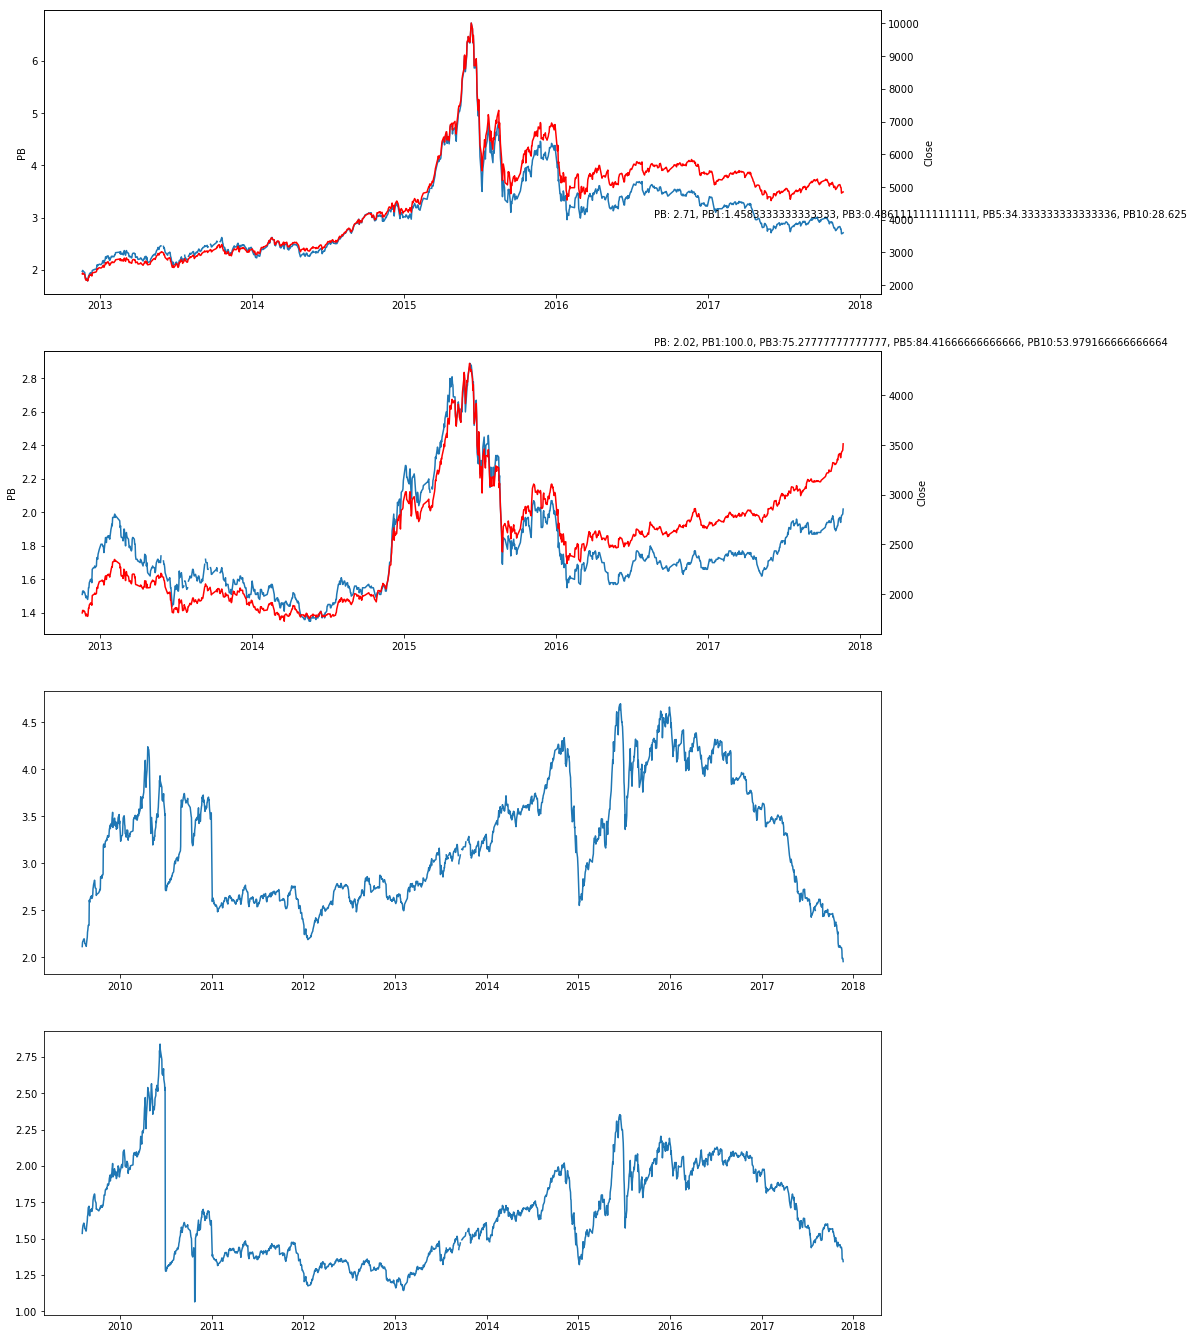

In [5]:
fig, axes = plt.subplots(4, 1, figsize=(15, 24))

ax1 = axes[0]
ax1.plot(df_xp['PB'][-1200:])
ax1.set_ylabel('PB')
ax2 = ax1.twinx()
ax2.plot(df_xp['Close'][-1200:], 'r')
ax2.set_ylabel('Close')

last_PB = df_xp['PB'][-1]

ax1.text(df_xp.index[-300], 3,
         'PB: {}, PB1:{}, PB3:{}, PB5:{}, PB10:{}'.format(
             float(last_PB),
             float(stats.percentileofscore(df_xp['PB'][-240:], last_PB)),
             float(stats.percentileofscore(df_xp['PB'][-720:], last_PB)),
             float(stats.percentileofscore(df_xp['PB'][-1200:], last_PB)),
             float(stats.percentileofscore(df_xp['PB'][-2400:], last_PB))))


ax2 = axes[1]
ax2.plot(df_jy['PB'][-1200:])
ax2.set_ylabel('PB')
ax3 = ax2.twinx()
ax3.plot(df_jy['Close'][-1200:], 'r')
ax3.set_ylabel('Close')

last_PB = df_jy['PB'][-1]
ax2.text(df_jy.index[-300], 3,
         'PB: {}, PB1:{}, PB3:{}, PB5:{}, PB10:{}'.format(
             float(last_PB),
             float(stats.percentileofscore(df_jy['PB'][-240:], last_PB)),
             float(stats.percentileofscore(df_jy['PB'][-720:], last_PB)),
             float(stats.percentileofscore(df_jy['PB'][-1200:], last_PB)),
             float(stats.percentileofscore(df_jy['PB'][-2400:], last_PB))))

ax3 = axes[2]
ax3.plot(df_xp['PE'][-2000:] / df_jy['PE'][-2000:] )

ax4 = axes[3]
ax4.plot(df_xp['PB'][-2000:] / df_jy['PB'][-2000:] )
 
plt.show()


In [7]:
(df_xp['PE'][-1600:] / df_jy['PE'][-1600:]).min(), df_xp['PE'][-20:] / df_jy['PE'][-20:]

(1.9514563106796114, Date
 2017-10-25    2.343
 2017-10-26    2.341
 2017-10-27    2.300
 2017-10-30    2.246
 2017-10-31    2.268
 2017-11-01    2.148
 2017-11-02    2.124
 2017-11-03    2.106
 2017-11-06    2.114
 2017-11-07    2.109
 2017-11-08    2.120
 2017-11-09    2.117
 2017-11-10    2.102
 2017-11-13    2.100
 2017-11-14    2.102
 2017-11-15    2.092
 2017-11-16    2.069
 2017-11-17    1.984
 2017-11-20    1.986
 2017-11-21    1.951
 Name: PE, dtype: float64)

In [8]:
(df_xp['PB'][-1600:] / df_jy['PB'][-1600:]).min(), df_xp['PB'][-20:] / df_jy['PB'][-20:]

(1.1421319796954315, Date
 2017-10-25    1.485
 2017-10-26    1.477
 2017-10-27    1.455
 2017-10-30    1.443
 2017-10-31    1.466
 2017-11-01    1.474
 2017-11-02    1.458
 2017-11-03    1.455
 2017-11-06    1.455
 2017-11-07    1.453
 2017-11-08    1.458
 2017-11-09    1.454
 2017-11-10    1.439
 2017-11-13    1.437
 2017-11-14    1.441
 2017-11-15    1.433
 2017-11-16    1.418
 2017-11-17    1.359
 2017-11-20    1.357
 2017-11-21    1.342
 Name: PB, dtype: float64)

In [9]:
df_jy['PB'][-100:]

Date
2017-06-27    1.83
2017-06-28    1.82
2017-06-29    1.83
2017-06-30    1.83
2017-07-03    1.83
2017-07-04    1.81
2017-07-05    1.84
2017-07-06    1.85
2017-07-07    1.85
2017-07-10    1.86
2017-07-11    1.88
2017-07-12    1.87
2017-07-13    1.90
2017-07-14    1.91
2017-07-17    1.90
2017-07-18    1.90
2017-07-19    1.93
2017-07-20    1.94
2017-07-24    1.95
2017-07-25    1.93
2017-07-26    1.92
2017-07-27    1.93
2017-07-28    1.93
2017-07-31    1.94
2017-08-01    1.96
2017-08-02    1.95
2017-08-03    1.93
2017-08-04    1.92
2017-08-07    1.93
2017-08-08    1.93
2017-08-09    1.93
2017-08-10    1.92
2017-08-11    1.88
2017-08-14    1.90
2017-08-15    1.91
2017-08-16    1.90
2017-08-17    1.91
2017-08-18    1.91
2017-08-21    1.91
2017-08-22    1.92
2017-08-23    1.92
2017-08-24    1.91
2017-08-25    1.93
2017-08-28    1.94
2017-08-29    1.93
2017-08-30    1.90
2017-08-31    1.87
2017-09-01    1.88
2017-09-04    1.88
2017-09-05    1.89
2017-09-06    1.89
2017-09-07    1.87
2017-09